# 라이브러리

In [ ]:
import os, glob, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 거래대금_순매수 파일 제작

In [ ]:
data_list = []
for i in range(1999, 2023) :
  data_list.append('data_'+str(i))

In [ ]:
os.chdir("/content/drive/MyDrive/데싸랩/EDA-미신검증/투자주체 데이터")

In [ ]:
# csv 파일이 들어 있는 mydir로 이동
# os.chdir("/content/drive/MyDrive/데싸랩/EDA-미신검증/투자주체 데이터")

# csv 파일 목록
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# 목록에 있는 모든 파일을 읽어들여 리스트로 만들고 합침.
# combined_csv = pd.concat([pd.read_csv(f, encoding='cp949') for f in all_filenames ])

# 합친 내용을 csv 파일로 저장함. 대부분 index는 제외하고 저장하는 것이 바람직함.
# combined_csv.to_csv( "거래량.csv")

KeyboardInterrupt: ignored

In [ ]:
import re

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/데싸랩/EDA-미신검증/투자주체 데이터/거래량.csv')

In [ ]:
# df['일자'] = pd.to_datetime(df['일자'])
# df = df.sort_values(by = '일자').drop('Unnamed: 0', axis = 1).reset_index(drop=True)
# df = df.fillna(0)
# df['기타법인'] = df['기관 합계'] + df['기타법인']
# df = df.drop(['기관 합계', '전체'], axis = 1)
# df.columns = ['date', 'inst', 'personal', 'foreign']
# df['sum'] = df['inst'] + df['personal'] + df['foreign']

In [ ]:
df.columns = ['date', 'inst', 'personal', 'foreign']
df['sum'] = df['inst'] + df['personal'] + df['foreign']
df

In [ ]:
# df.to_csv('거래대금_순매수', index = False)

# 한국장은 누가 견인하는가

In [ ]:
# data1 = pd.read_csv('/content/drive/MyDrive/데싸랩/EDA-미신검증/투자주체 데이터/거래대금_순매수', parse_dates = ['date'])
# data2 = pd.read_csv('/content/drive/MyDrive/데싸랩/EDA-미신검증/kospi_data.csv', parse_dates = ['Date'])
# data1_col -> date, inst, personal, foreign, sum
# data2_col -> 'Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Change'

In [ ]:
df = pd.merge(data1, data2, left_on = 'date', right_on = 'Date')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
x = ['inst', 'personal', 'foreign']
y = []
entire_pv = []
for i in x:
  y.append(np.corrcoef(df[i], df['Change'])[0,1])
  entire_pv.append(stats.pearsonr(df[i], df['Change'])[1])
entire_pv

[5.1274006230414495e-55, 5.878777836766171e-254, 1.8855922060470405e-139]

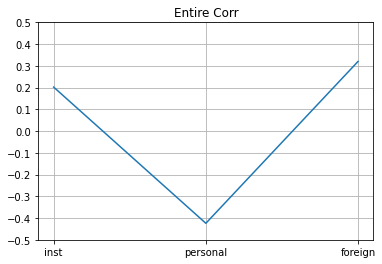

In [ ]:
entire_corr = pd.DataFrame(y, index = x, columns = ['corr'])
plt.plot(entire_corr)
plt.grid()
plt.yticks(np.arange(-0.5, 0.6, 0.1))
plt.title('Entire Corr')
plt.show()

In [ ]:
latest_10 = range(2013, 2023)
cor10 = pd.DataFrame(index = latest_10, columns = x)
pv10 = pd.DataFrame(index = latest_10, columns = x)
for i in latest_10:
  k = df[df['year'] == i]
  cor = []
  pv = []
  for j in x:
    cor.append(np.corrcoef(k[j], k['Change'])[0,1])
    pv.append(stats.pearsonr(k[j], k['Change'])[1])
  cor10.loc[i] = cor
  pv10.loc[i] = pv

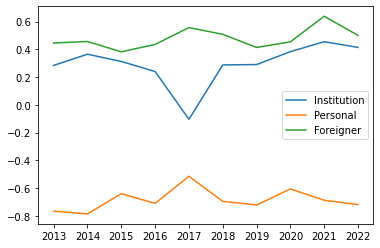

In [ ]:
# 최근 10년간 투자자 유형과 변동률 간의 상관관계
plt.plot(cor10.index, cor10.inst, label = 'Institution')
plt.plot(cor10.index, cor10.personal, label = 'Personal')
plt.plot(cor10.index, cor10.foreign, label = 'Foreigner')
plt.legend()
plt.xticks(latest_10)
plt.show()

In [ ]:
pv10.T

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
inst,0.000006,0.0,0.000001,0.000147,0.103874,0.000005,0.000004,0.0,0.0,0.0
personal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
foreign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 12 artists>

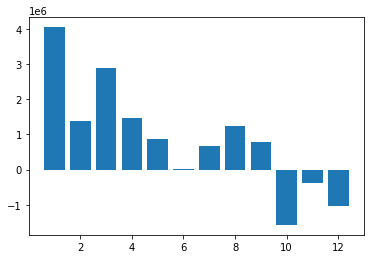

In [ ]:
frgn_sum = df.groupby(['year', 'month'])['foreign'].sum().reset_index()
plt.bar(x = range(1,13), height = frgn_sum[frgn_sum['year'] == 2004]['foreign'])
#월별 / 연도별 변동률 그래프

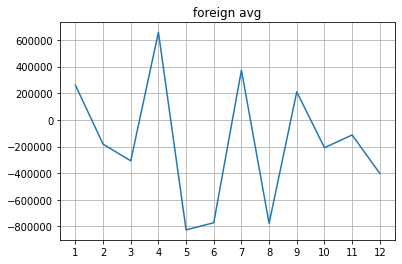

In [ ]:
plt.plot(frgn_sum.groupby('month').mean()['foreign'])
plt.title('foreign avg')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


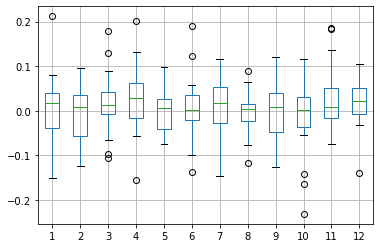

In [ ]:
df.pivot_table(index = 'year', columns = 'month', values = 'Change.', aggfunc ='sum').boxplot()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


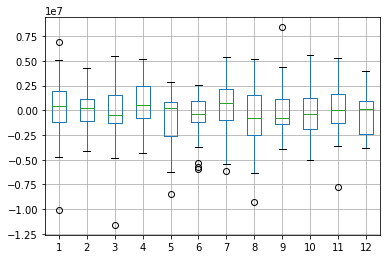

In [ ]:
df.pivot_table(index = 'year', columns = 'month', values = 'foreign', aggfunc ='sum').boxplot()

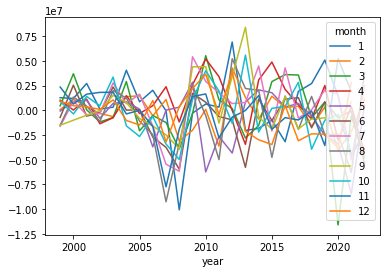